# BERT Emotion Classification Confusion Matrix and Other Performance Metrics

In [2]:
import pandas as pd

In [3]:
df_prediction = pd.read_excel('dataframe_tfidf_emotion.xlsx')

In [4]:
df_prediction = df_prediction[['track', 'artist', 'clean_text', 'pred', 'label']]
df_prediction

,track,artist,clean_text,pred,label
0,Exactly Like You,Scatman Crothers,used perfect sweetheart real one dream wonderf...,3,contentment
1,Too Marvelous for Words,Dick Robertson,youre marvelous marvelous words like glorious ...,3,contentment
2,Skyscrapers [Version],OK Go,skyscrapers please forgive didnt mean word sai...,5,sadness
3,Next Time Around,Emiliana Torrini,came question time answer came back long house...,6,excitement
4,September Song [From Knickerbocker Holiday],Theodore Bikel,oh long long may december days grow short reac...,5,sadness
...,...,...,...,...,...
14980,Alone in Your Heart,Monica,girls ask im girl say ooh ooh ooh diamond pear...,5,sadness
14981,Too Busy Thinking 'Bout My Baby,Andy Abraham,listen people aint got time think money buy ai...,6,excitement
14982,The Devil in Georgia,Fiddlin' Doc Roberts,devil went georgia lookin soul steal bind caus...,0,anger
14983,Bringin' It,Timbaland,yo yo yo yo yo yo ha ha aint baby dont stop li...,2,fear


In [5]:
df_original = pd.read_csv('data/muse_v3.csv')

In [6]:
df_original = df_original.drop(columns=['lastfm_url', 'valence_tags', 'arousal_tags', 'dominance_tags', 'mbid', 'spotify_id', 'genre', 'number_of_emotion_tags'])
df_original

,track,artist,seeds
0,'Till I Collapse,Eminem,['aggressive']
1,St. Anger,Metallica,['aggressive']
2,Speedin',Rick Ross,['aggressive']
3,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']"
4,Die MF Die,Dope,['aggressive']
...,...,...,...
89996,Battle,Gaby Hoffmann & Jay Duplass,['transparent']
89997,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent']
89998,Crookfield Zoo,Ace White,['transparent']
89999,Transparent (Full Version),Second Chyld,['transparent']


In [7]:
merge_df = pd.merge(df_original, df_prediction, on=['track', 'artist'], how="inner")
merge_df

,track,artist,seeds,clean_text,pred,label
0,St. Anger,Metallica,['aggressive'],saint anger round neck saint anger round neck ...,0,anger
1,Sweet Amber,Metallica,['aggressive'],wash back wont stab mine get bed kind live lif...,5,sadness
2,When Girls Telephone Boys,Deftones,"['aggressive', 'angry', 'driving', 'energetic']",always old taste new injury well ill wear claw...,5,sadness
3,Combat,Deftones,"['aggressive', 'intense', 'epic', 'uplifting']",time get finger pointed right side side asked ...,6,excitement
4,What If We Could,Blue October,['aggressive'],could put lives hold meet inside world would m...,5,sadness
...,...,...,...,...,...,...
688,World Before Columbus,Suzanne Vega,['soft'],love taken every color would black white would...,5,sadness
689,Broken Joystick,Adam Green,['soft'],skelton smoking plane catch train open vein sm...,2,fear
690,Bungee,Adam Green,['soft'],used live indian chief gave clap got priest ni...,5,sadness
691,Goodnight My Friend,Vertical Horizon,['soft'],goodnight sun goodnight friend rest soul long ...,3,contentment


In [8]:
import ast

def convert_to_list(string):
    try:
        list_obj = ast.literal_eval(string)
        if isinstance(list_obj, list):
            return list_obj
    except (ValueError, SyntaxError):
        pass
    return []

merge_df['label_original'] = merge_df['seeds'].apply(lambda x: convert_to_list(x))



In [9]:
merge_df

,track,artist,seeds,clean_text,pred,label,label_original
0,St. Anger,Metallica,['aggressive'],saint anger round neck saint anger round neck ...,0,anger,[aggressive]
1,Sweet Amber,Metallica,['aggressive'],wash back wont stab mine get bed kind live lif...,5,sadness,[aggressive]
2,When Girls Telephone Boys,Deftones,"['aggressive', 'angry', 'driving', 'energetic']",always old taste new injury well ill wear claw...,5,sadness,"[aggressive, angry, driving, energetic]"
3,Combat,Deftones,"['aggressive', 'intense', 'epic', 'uplifting']",time get finger pointed right side side asked ...,6,excitement,"[aggressive, intense, epic, uplifting]"
4,What If We Could,Blue October,['aggressive'],could put lives hold meet inside world would m...,5,sadness,[aggressive]
...,...,...,...,...,...,...,...
688,World Before Columbus,Suzanne Vega,['soft'],love taken every color would black white would...,5,sadness,[soft]
689,Broken Joystick,Adam Green,['soft'],skelton smoking plane catch train open vein sm...,2,fear,[soft]
690,Bungee,Adam Green,['soft'],used live indian chief gave clap got priest ni...,5,sadness,[soft]
691,Goodnight My Friend,Vertical Horizon,['soft'],goodnight sun goodnight friend rest soul long ...,3,contentment,[soft]


In [10]:

def extract_first_element(lst):
    if isinstance(lst, list) and len(lst) > 0:
        return lst[0]
    return None

merge_df['label_original_first'] = merge_df['label_original'].apply(lambda x: extract_first_element(x))


In [11]:
merge_df['label_original_first'].unique()

array(['aggressive', 'angry', 'explosive', 'fierce', 'hyper', 'intense',
       'manic', 'ominous', 'provocative', 'apocalyptic', 'dark', 'eerie',
       'halloween', 'paranoid', 'scary', 'spooky', 'urgent', 'bitter',
       'bleak', 'brittle', 'cold', 'lonely', 'nocturnal', 'delicate',
       'dreamy', 'ethereal', 'gentle', 'intimate', 'introspective',
       'lazy', 'pastoral', 'relaxed', 'soothing', 'sparse', 'acerbic',
       'ironic', 'sarcastic', 'satirical', 'brassy', 'cathartic',
       'dramatic', 'eccentric', 'enigmatic', 'epic', 'lush', 'monumental',
       'mysterious', 'mystical', 'spiritual', 'stylish', 'theatrical',
       'uplifting', 'campy', 'carefree', 'cheerful', 'fun', 'happy',
       'humorous', 'playful', 'positive', 'silly', 'witty', 'earthy',
       'gritty', 'organic', 'warm', 'erotic', 'euphoric', 'exotic',
       'passionate', 'romantic', 'sensual', 'sexy', 'sleazy', 'complex',
       'elegant', 'lyrical', 'narrative', 'serious', 'sophisticated',
       'tec

In [12]:
merge_df[merge_df['label_original_first'] == 'sad']


,track,artist,seeds,clean_text,pred,label,label_original,label_original_first
499,Outside,Staind,['sad'],bring knees times could beg please vain times ...,2,fear,[sad],sad
500,Pink + White,Frank Ocean,"['sad', 'smooth', 'optimistic']",yeah yeah oh yeah yeah yeah thats way everyday...,5,sadness,"[sad, smooth, optimistic]",sad
501,Perfect,Simple Plan,['sad'],hey dad look think back talk grow according pl...,5,sadness,[sad],sad
502,Home,Foo Fighters,"['sad', 'mellow']",wish couldnt stay every direction leads away p...,5,sadness,"[sad, mellow]",sad
503,Screaming Infidelities,Dashboard Confessional,['sad'],im missing bed never sleep avoiding spots wed ...,5,sadness,[sad],sad
504,Try Again,Keane,"['sad', 'mellow']",fell asleep late night train missed stop went ...,5,sadness,"[sad, mellow]",sad
505,Darkness,Disturbed,['sad'],dont turn away pray youve heard words ive spok...,2,fear,[sad],sad
506,Rescued,Jack's Mannequin,['sad'],two one static sound undone last time hiding b...,6,excitement,[sad],sad
507,Supermarket Flowers,Ed Sheeran,['sad'],took supermarket flowers windowsill threw day ...,5,sadness,[sad],sad


In [13]:
merge_df[merge_df['label_original_first'] == 'exciting']


,track,artist,seeds,clean_text,pred,label,label_original,label_original_first
647,The Kiss,Judee Sill,['exciting'],ove rising mists promise holy breath touching ...,5,sadness,[exciting],exciting
648,Bama Lama Bama Loo,Little Richard,"['exciting', 'thrilling']",bama lama bama loo got girl named lucinda call...,6,excitement,"[exciting, thrilling]",exciting
649,I Can't Lie,Shea Seger,['exciting'],looked inside cant find living perfect world t...,6,excitement,[exciting],exciting


In [14]:
merge_df[merge_df['label_original_first'] == 'angry']

,track,artist,seeds,clean_text,pred,label,label_original,label_original_first
10,Rootless Tree,Damien Rice,"['angry', 'intense', 'melancholy', 'sad', 'pow...",want empty head well say true dont stain bed w...,0,anger,"[angry, intense, melancholy, sad, powerful, me...",angry
11,Born Like This,Three Days Grace,['angry'],took stole born like time come change stretch ...,5,sadness,[angry],angry
12,Say Days Ago,The Used,"['angry', 'energetic']",still remember year ago times spent think im h...,6,excitement,"[angry, energetic]",angry
13,Sowing Season,Brand New,"['angry', 'epic']",losing friends losing drinking driving losing ...,5,sadness,"[angry, epic]",angry
14,Gardenhead/Leave Me Alone,Neutral Milk Hotel,['angry'],life mystery everyone must stand alone hear ca...,5,sadness,[angry],angry
15,The Childcatcher,Patrick Wolf,"['angry', 'unsettling', 'dark', 'halloween', '...",still child caught tied bed gave shoes pretty ...,0,anger,"[angry, unsettling, dark, halloween, scary, et...",angry
16,Gloom and How It Gets That Way,Every Time I Die,['angry'],pull car youre frightening kids promise us gri...,2,fear,[angry],angry
17,Faster,Third Eye Blind,['angry'],horny burnout always ends chemicals wear summe...,5,sadness,[angry],angry
18,Whitey on the Moon,Gil Scott-Heron,['angry'],rat done bit sister nell whitey moon face arms...,5,sadness,[angry],angry
19,The Song Remains Insane,Soulfly,['angry'],live life way taught feel survive jungle give ...,3,contentment,[angry],angry


In [26]:
# !pip install seaborn

In [29]:
merge_df['label_original_first'] = merge_df['label_original_first'].replace({
    'angry': 'anger',
    'exciting': 'excitement',
    'sad': 'sadness'
})

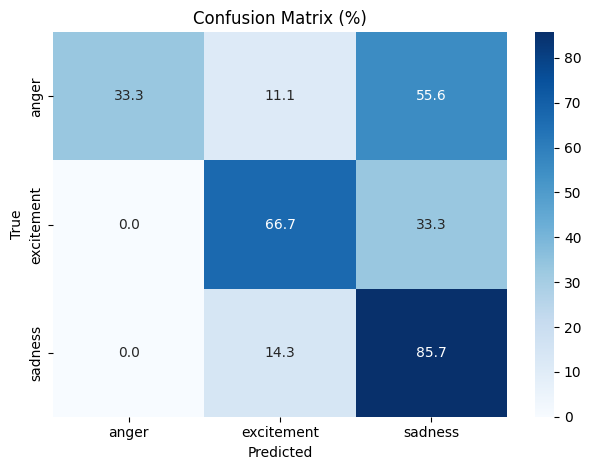

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = merge_df['label_original_first']
y_pred = merge_df['label']

desired_labels = ['anger', 'excitement', 'sadness']
y_true_filtered = y_true[y_true.isin(desired_labels)]
y_pred_filtered = y_pred[y_true.isin(desired_labels)]

cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_labels)

row_sums = cm.sum(axis=1, keepdims=True)

cm_percentages = cm / row_sums * 100

sns.heatmap(cm_percentages, annot=True, fmt='.1f', cmap='Blues')

tick_labels = ['anger', 'excitement', 'sadness']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (%)")
plt.tight_layout()

plt.show()


In [33]:
from sklearn.metrics import precision_recall_fscore_support

y_true = merge_df['label_original_first']
y_pred = merge_df['label']

desired_labels = ['anger', 'excitement', 'sadness']
y_true_filtered = y_true[y_true.isin(desired_labels)]
y_pred_filtered = y_pred[y_true.isin(desired_labels)]

precision, recall, f1_score, _ = precision_recall_fscore_support(
    y_true_filtered,
    y_pred_filtered,
    labels=desired_labels,
    average='weighted'
)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.7692307692307693
Recall: 0.4230769230769231
F1 Score: 0.45378151260504207
